# Project Final Report

### Due: Midnight on April 27 (2-hour grace period) — 50 points  

### No late submissions will be accepted.


## Overview

Your final submission consists of **three components**:

---

### 1. Final Report Notebook [40 pts]

Complete all sections of this notebook to document your final decisions, results, and broader context.

- **Part A**: Select the single best model from your Milestone 2 experiments. Now that you’ve finalized your model, revisit your decisions from Milestones 1 and 2. Are there any steps you would change—such as cleaning, feature engineering, or model evaluation—given what you now know?

- **Part B**: Write a technical report following standard conventions, for example:
  - [CMU guide to structure](https://www.stat.cmu.edu/~brian/701/notes/paper-structure.pdf)
  - [Data science report example](https://www.projectpro.io/article/data-science-project-report/620)
  - The Checklist given in this week's Blackboard Lesson (essentially the same as in HOML).
    
  Your audience here is technically literate but unfamiliar with your work—like your manager or other data scientists. Be clear, precise, and include both code (for illustration), charts/plots/illustrations, and explanation of what you discovered and your reasoning process. 

The idea here is that Part A would be a repository of the most important code, for further work to come, and Part B is
the technical report which summarizes your project for the data science group at your company. Do NOT assume that readers of Part B are intimately familiar with Part A; provide code for illustration as needed, but not to run.

Submit this notebook as a group via your team leader’s Gradescope account.

---

### 2. PowerPoint Presentation [10 pts]

Create a 10–15 minute presentation designed for a general audience (e.g., sales or marketing team).

- Prepare 8–12 slides, following the general outline of the sections of Part B. 
- Focus on storytelling, visuals (plots and illustrations), and clear, simplified language. No code!
- Use any presentation tool you like, but upload a PDF version.
- List all team members on the first slide.

Submit as a group via your team leader’s Gradescope account.

---

### 3. Individual Assessment

Each team member must complete the Individual Assessment Form (same as in Milestone 1), sign it, and upload it via their own Gradescope account.

---

## Submission Checklistå

-  Final Report Notebook — Team leader submission
-  PDF Slides — Team leader submission
-  Individual Assessment Form — Each member submits their own


## Part A: Final Model and Design Reassessment [10 pts]

In this part, you will finalize your best-performing model and revisit earlier decisions to determine if any should be revised in light of your complete modeling workflow. You’ll also consolidate and present the key code used to run your model on the preprocessed dataset, with thoughtful documentation of your reasoning.

**Requirements:**

- Reconsider **at least one decision from Milestone 1** (e.g., preprocessing, feature engineering, or encoding). Explain whether you would keep or revise that decision now that you know which model performs best. Justify your reasoning.
  
- Reconsider **at least one decision from Milestone 2** (e.g., model evaluation, cross-validation strategy, or feature selection). Again, explain whether you would keep or revise your original decision, and why.

- Below, include all code necessary to **run your final model** on the processed dataset. This section should be a clean, readable summary of the most important steps from Milestones 1 and 2, adapted as needed to fit your final model choice and your reconsiderations as just described. 

- Use Markdown cells and inline comments to explain the structure of the code clearly but concisely. The goal is to make your reasoning and process easy to follow for instructors and reviewers.

> Remember: You are not required to change your earlier choices, but you *are* required to reflect on them and justify your final decisions.


### Milestone 1 Reassessment — Data Cleaning, Feature Engineering, and Encoding

In Milestone 1, we followed a structured, methodical approach to data preparation, including outlier removal, missing data imputation, and domain-informed feature engineering. These steps were aimed at improving signal clarity and model performance. 

#### Feature Dropping and Data Cleaning

We began by dropping non-predictive metadata columns such as parcelid, assessmentyear, and various square footage fields tied to rare property types. We also removed columns with over 50% missing data, excluded rows with missing target values, and dropped any rows where more than 20% of the features were missing.

Prior to feature-target separation, we ensured that any rows with missing target values were dropped explicitly, as required by the assignment spec.

Now that we've selected Random Forest as our final model, we would revisit the decision to drop outliers. Since Random Forest is generally robust to outliers, those extreme values could have contained useful information about high- or low-end properties. Future iterations may benefit from retaining them or modeling them separately.

#### Missing Data Imputation

Our imputation strategy was simple and effective:

- **Numerical features:** imputed using the median  
- **Categorical features:** imputed with the mode, or Unknown if no mode was available

This aligns well with Random Forest’s ability to handle noisy or incomplete data, and we’d keep this approach in future pipelines.

#### Feature Engineering

We engineered three new features to better capture non-linear relationships:

- bed_bath_interaction: the product of bedrooms and bathrooms  
- rooms_per_bedroom: a normalized count of rooms per bedroom  
- property_age: years since the property was built  

These features are particularly useful for tree-based models like Random Forest, which can isolate splits on informative constructed variables.

To prevent propagation of missing values in engineered features, we now explicitly impute yearbuilt, bedroomcnt, and bathroomcnt prior to applying the feature engineering step. While this deviates slightly from our original plan to rely entirely on a clean pipeline, it ensures robust feature values and prevents NaN from being introduced during multiplication or division.

#### Encoding Strategy — Revision 

One notable gap in our original workflow was the lack of categorical encoding. While we addressed missing values, we didn’t apply one-hot or label encoding, which impacted model interpretability and potentially accuracy.

Random Forest can technically handle label-encoded inputs, but one-hot encoding is more appropriate when categories are non-ordinal. It prevents the model from assuming false numeric relationships between categories. Going forward, we would incorporate one-hot encoding for categorical variables—even in tree-based models—to avoid introducing misleading structure.

---

### Milestone 2 Reassessment — Model Evaluation, Tuning Strategy, and Pipeline Design

In Milestone 2, we advanced our workflow by evaluating three strong models: Random Forest, Gradient Boosting, and Ridge Regression. We took a consistent, structured approach to hyperparameter tuning using GridSearchCV, which allowed for reproducible and fair comparisons.

#### Hyperparameter Tuning

Each model was tuned with parameters suited to its design:

- **Random Forest:** n_estimators, max_depth, min_samples_split, min_samples_leaf  
- **Gradient Boosting:** n_estimators, learning_rate, max_depth  
- **Ridge Regression:** alpha for L2 regularization  

These choices were based on a balance between theory and practical experience—aiming to manage complexity, reduce overfitting, and improve generalization.

#### Pipeline Design and Preprocessing

Each model was wrapped in a modular pipeline that included:

- Missing value imputation (carried over from Milestone 1)  
- Optional feature scaling via StandardScaler  
- Polynomial features for Ridge  
- Feature selection via SelectKBest  

These steps helped Ridge but didn’t provide meaningful gains for tree-based models. Since tree models handle scaling and non-linearities inherently, we’d streamline their pipelines by removing unnecessary transformations.

#### Model Selection and Evaluation

We used cross-validated RMSE as well as test set RMSE to evaluate model performance:

| Model              | Mean CV RMSE | Std CV RMSE | Test RMSE |
|-------------------|--------------|-------------|-----------|
| Random Forest      | 58.29        | 34.85       | 32.69     |
| Gradient Boosting  | 120.02       | 15.01       | Higher    |
| Ridge Regression   | ~36 million  | ~72 million | High      |

Random Forest outperformed the others by a wide margin in both training and test metrics. In addition to its strong performance, it offered robust handling of noisy data and reasonable interpretability via feature importance. This led us to select it as our final model.

Additionally, we updated our performance evaluation code to use root_mean_squared_error, a newer function introduced in scikit-learn to replace the older mean_squared_error(..., squared=False) syntax. This change eliminates deprecation warnings and aligns our code with current library best practices.


---

## Reflection and Recommendations
Our overall modeling workflow felt strong—thorough, well-structured, and backed results. If we were to continue iterating, we’d make a few key adjustments:
* Simplify preprocessing for tree-based models since they don’t benefit much from scaling or polynomial transformations
* Narrow hyperparameter ranges in future searches to speed up tuning based on what we’ve already learned
* Add categorical encoding directly into the pipeline to keep preprocessing consistent across models
* Wrap feature engineering steps in a FunctionTransformer to keep everything modular and pipeline-friendly

When finalizing the Random Forest pipeline, we also made a few important updates that improved its clarity and reproducibility:
- We made sure to drop any rows with missing target values before defining features and labels (in line with Milestone 1 expectations)
- We explicitly imputed key columns used in feature engineering (yearbuilt, bedroomcnt, and bathroomcnt) to avoid introducing NaNs during multiplication or division
- We added a np.isfinite() check after feature engineering to catch any unexpected data quality issues early
- We updated the evaluation to use root_mean_squared_error, replacing the deprecated mean_squared_error(..., squared=False)
- We reported multiple metrics (RMSE, MAE, and R²) to better assess how well the model performed on the holdout test set

Together, these changes helped us build a model that’s not just accurate, but also more reliable and easier to maintain. Random Forest proved to be a great fit, and we’d continue to refine the pipeline with its strengths in mind going forward.

### Code Blocks & Commentary

### Final Preprocessing and Modeling Pipeline – Code

The code block below brings together everything we finalized across Milestones 1 and 2, with updates based on our Part A reflection:

- **From Milestone 1**:  
  - Used median imputation for numeric features and mode (or 'Unknown') for categorical  
  - Created engineered features: property_age, rooms_per_bedroom, and bed_bath_interaction  
  - Added one-hot encoding for categorical variables (previously missing)  
  - Now explicitly drops rows with missing target values before modeling  
  - Ensures feature engineering columns are imputed beforehand to avoid introducing NaNs  

- **From Milestone 2**:  
  - Final model: RandomForestRegressor  
  - Tuned hyperparameters: n_estimators=100, max_depth=None, etc.  
  - Streamlined preprocessing by skipping scaling and polynomial features (not needed for trees)  
  - Updated evaluation: now uses root_mean_squared_error and reports RMSE, MAE, and R² to give a more complete view of performance  

This consolidated pipeline reflects our final modeling decisions. It’s clean, reproducible, and aligned with current best practices in scikit-learn.

**Note:** While many of these steps were originally developed in earlier milestones, the code below pulls everything into one end-to-end workflow that captures what we learned and refined throughout the project.



In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [9]:
# ===  RANDOM FOREST MODEL PIPELINE  ===
#Set seed for reproducibility
np.random.seed(42)

#Load dataset previously cleaned
df = pd.read_csv("zillow_cleaned.csv")

#Drop irrelevant and high-missing columns early
columns_to_drop = [
    "parcelid", "assessmentyear", "storytypeid", "unitcnt",
    "yardbuildingsqft17", "yardbuildingsqft26", "transactiondate"
]
df = df.drop(columns=columns_to_drop, errors="ignore")

#Drop rows with missing target values
df = df[df["taxvaluedollarcnt"].notna()]

#Drop rows where more than 20% of features are missing
row_missing_frac = df.isnull().mean(axis=1)
df = df[row_missing_frac <= 0.20]

#Impute columns needed for feature engineering BEFORE using them
for col in ["yearbuilt", "bedroomcnt", "bathroomcnt"]:
    df[col] = df[col].fillna(df[col].median())



#Feature & target separation
X = df.drop(columns=["taxvaluedollarcnt"])
y = df["taxvaluedollarcnt"]

#Feature engineering
X["property_age"] = 2017 - X["yearbuilt"]
X["rooms_per_bedroom"] = X["roomcnt"] / (X["bedroomcnt"] + 1)
X["bed_bath_interaction"] = X["bedroomcnt"] * X["bathroomcnt"]

#Drop irrelevant and high-missing columns
columns_to_drop = [
    "parcelid", "assessmentyear", "storytypeid", "unitcnt",
    "yardbuildingsqft17", "yardbuildingsqft26", "transactiondate"
]
X = X.drop(columns=columns_to_drop, errors="ignore")

#Check for invalid/infinite values
print("All values finite after feature engineering:", np.isfinite(X).all().all())

#Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

#Define preprocessing pipeline
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

#Final model pipeline w/tuned Random Forest

final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Fit model
final_model.fit(X_train, y_train)

#Evaluate on test set
y_pred = final_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Final Test RMSE: ${test_rmse:,.2f}")
print(f"Final Test MAE:  ${test_mae:,.2f}")
print(f"Final Test R²:   {test_r2:.4f}")

#cross-validated RMSE (on training set only)
cv_scores = cross_val_score(
    final_model, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5
)
print(f"CV RMSE (mean ± std): {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}")




All values finite after feature engineering: True
Final Test RMSE: $32.69
Final Test MAE:  $14.83
Final Test R²:   1.0000
CV RMSE (mean ± std): 58.29 ± 34.85


## Part B: Final Data Science Project Report Assignment [30 pts]

This final report is the culmination of your semester-long Data Science project, building upon the exploratory analyses and modeling milestones you've already completed. Your report should clearly communicate your findings, analysis approach, and conclusions to a technical audience. The following structure and guidelines, informed by best practices, will help you prepare a professional and comprehensive document.

### Required Sections

Your report must include the following sections:


#### 1. Executive Summary (Abstract) [2 pts]
- Brief overview of the entire project (150–200 words)
- Clearly state the objective, approach, and key findings

# Executive Summary

In this project, we analyzed a cleaned version of Zillow’s housing dataset to build predictive models for estimating the tax-assessed value of residential properties (taxvaluedollarcnt). Our identify key fields that influence home values and develop accurate models that could support investment decisions. We started with EDA to understand feature distributions, detect outliers, and assess missing data. From there, we cleaned and imputed the data, removed low-variance or high-nullity columns, and engineered new features to better capture relationships in the dataset.

To evaluate model performance, we focused on RMSE as our primary metric and compared several regression models, including Ridge, Lasso, Random Forest, and Gradient Boosting. After applying cross-validation and tuning hyperparameters, Random Forest was the most successful model, offering both strong accuracy and consistent results across folds. 

Our findings provide valuable insights for real estate professionals, particularly in identifying which home features most influence property value. Overall, this project demonstrates the potential of data science to bring clarity and precision to property valuation.

#### 2. Introduction [2 pts]
- Clearly introduce the topic and context of your project
- Describe the problem you are addressing (the problem statement)
- Clearly state the objectives and goals of your analysis

Note: You may imaginatively consider this project as taking place in a real estate company with a small data science group in-house, and write your introduction from this point of view (don't worry about verisimilitude to an actual company!).  

# Introduction

As part of a small data science team within a real estate investment company, our role is to develop tools that can help our team make smarter, data-driven decisions about which properties to invest in. One of the biggest challenges in the real estate world is accurately assessing the value of a home, especially in markets where prices can vary widely based on location, size, and many other features. For this project, we focused on building a predictive model that estimates a home’s tax-assessed value using a cleaned version of Zillow’s housing dataset.

The ability to predict property values reliably has practical implications for our business in three ways: it can help us spot undervalued homes, avoid overpaying for assets, and identify key features that signal investment potential. We set out to understand which property characteristics have the strongest influence on value and to test different modeling techniques to find the most accurate and consistent approach.

Our ultimate goal was to create a model that could be used in various facets, whether that’s helping acquisition teams prioritize leads or advising renovation teams on which home features may deliver the highest return. This project not only gave us a chance to apply key data science skills, but also highlighted the value of combining machine learning with practical insights to solve real business problems.

#### 3. Data Description [2 pts]
- Describe the source of your dataset (described in Milestone 1)
- Clearly state the characteristics of your data (size, types of features, missing values, target, etc.)

# Data Description

This dataset offers a mix of attributes for residential properties across the United States, capturing structural details, geographic identifiers, and financial information. The primary goal was to use these features to predict the tax-assessed value of each home, represented by the target variable taxvaluedollarcnt.

The dataset contains approximately 34,000 observations, with features falling into two broad categories:
1. Numerical features: finishedsquarefeet12, bathroomcnt, bedroomcnt, lotsizesquarefeet, and yearbuilt. These attributes describe the size, age, and structure of each home.
2. Categorical features: regionidcounty, propertyzoningdesc, and other classification-type fields that group properties by region or zoning designation.

During preprocessing, we encountered data quality challenges:
1. Many features had missing values, particularly in fields like propertyzoningdesc and buildingqualitytypeid. We addressed this by dropping columns with over 50% missing data and imputing remaining numerical columns using the median to reduce skewness. Categorical variables were encoded using one-hot encoding to retain compatibility with tree-based models.
2. Some properties had extremely high values which skewed the data distribution. We examined these outliers and removed or transformed them where appropriate to reduce their impact on model performance.

#### 4. Methodology (What you did, and why)  [12 pts]

**Focus this section entirely on the steps you took and your reasoning behind them. Emphasize the process and decision-making, not the results themselves**

- Describe your analytical framework 
  - Use of validation curves to see the effect of various hyperparameter choices, and
  - Choice of RMSE as primary error metric
- Clearly outline your data cleaning and preprocessing steps
  - Describe what issues you encountered in the raw data and how you addressed them.
  - Mention any key decisions (e.g., removing samples with too many missing values).
  - What worked and what didn't work?
- Describe your feature engineering approach
  - Explain any transformations, combinations, or derived features.
  - Discuss why certain features were chosen or created, even if they were later discarded.
  - What worked and what didn't work?
- Detail your model selection process 
  - Outline the models you experimented with and why.
  - Discuss how you evaluated generalization (e.g., cross-validation, shape and relationships of plots).
  - Mention how you tuned hyperparameters or selected the final model.



# Methodology


Our approach followed a structured machine learning pipeline, starting with data cleaning and exploration, followed by feature engineering, model selection, and hyperparameter tuning. At each step, we made decisions based on visualizations, data distributions, and model performance diagnostics to build an accurate and interpretable model for predicting tax-assessed home values.
#### Analytical Framework
Since we were predicting a continuous variable of taxvaluedollarcnt, we used regression models. To measure model performance, we chose Root Mean Squared Error as our main metric because it emphasizes larger errors. This makes sense when dealing with home prices that can vary by hundreds of thousands of dollars. We also used validation curves to explore how different hyperparameters like tree depth or number of trees impacted model performance. This helped us figure out where models were underfitting or overfitting before going into full hyperparameter tuning.
#### Data Cleaning & Preprocessing
Our first step was handling missing values and messy columns. Some features had more than 50% missing data, so we dropped those altogether. For the rest, we used median imputation to fill in gaps in numeric columns, which helped preserve the distribution without being thrown off by outliers. We used ordinal encoding for categorical variables to convert them into a usable format for our models.
We also ran into some pretty big outliers like homes valued at over $10 million or with square footage above 10,000. These extreme cases skewed our distributions and risked distorting our models, so we decided to remove them. In a few cases where rows had too many missing values, we dropped them entirely. Overall, this cleaning process gave us a much more manageable and balanced dataset to work with. One thing that didn’t go as smoothly was trying to fix skewed features like lotsizesquarefeet—even after applying a log transformation, it still wasn’t ideal.
#### Feature Engineering
Once the data was clean, we moved on to making it more informative for our models. We created log-transformed versions of highly skewed variables like taxvaluedollarcnt and finishedsquarefeet12 to reduce the impact of extreme values. We also tested interaction terms between features like bedroom and bathroom counts, thinking that combinations of features might be more predictive than individual ones.
We briefly experimented with polynomial features, like squaring the size of a home or creating higher order terms, but these didn’t help much. Instead, they added complexity without improving performance, so we left them out in the final version. To focus on the most relevant features, we used SelectKBest with F-regression. This helped us narrow down which variables had the strongest relationships with the target value and reduce unnecessary noise.
#### Model Selection & Tuning
We wanted to compare different types of models to see what worked best for our dataset. We started with simpler linear models like Ridge and Lasso to get a baseline, and then moved on to more flexible tree-based models like Random Forest and Gradient Boosting. These models are great for capturing non-linear patterns and don’t require much scaling or transformation. To make sure our models would generalize well, we used Repeated K-Fold cross-validation with 5 splits and 3 repeats. This gave us a better idea of how models would perform across different subsets of the data, rather than just relying on a single train/test split. We tuned our models using both GridSearchCV and RandomizedSearchCV, depending on the size of the parameter space. After testing everything, Random Forest ended up performing the best. It gave us strong accuracy and consistent results across all folds. It offered helpful insights like feature importance, which gave us a better understanding of what the model was actually using to make predictions.

#### 5. Results and Evaluation (What you found, and how well it worked) [10 pts]

**Focus purely on outcomes, with metrics, visuals, and insights. This is where you present evidence to support your conclusions.**

- Provide a clear and detailed narrative of your analysis and reasoning using the analytical approach described in (4). 
- Discuss model performance metrics and results (RMSE, R2, etc.)
- **Include relevant visualizations (graphs, charts, tables) with appropriate labels and captions**
- Error analysis
  - Highlight specific patterns of error, outliers, or questionable features.
  - Note anything surprising or worth improving in future iterations.


# Results and Evaluation

For this project, we tested a few different models to predict property tax values and we were pleased with how well they worked. After tuning and cross-validation, Random Forest came out way ahead of the others. It scored an average cross-validation RMSE of 58.29 with a standard deviation of 34.85, which showed it was not only accurate but also pretty stable across different splits of the data. Gradient Boosting was the next best, but it was quite a bit slower to train and still didn't beat Random Forest on performance. Ridge Regression didn’t do well at all — it struggled because it couldn't capture the non-linear patterns that were clearly important in this data.

When we put the final Random Forest model on the test set, we got the following results: Test RMSE came in at 32.69, Test MAE was 14.83, and the Test R² was basically perfect at 1.0000. This means the model's predictions were almost spot-on with the real values.

As far as where the model struggled, most of the bigger errors happened with really unusual properties — ones that had either massive lot sizes, missing data like year built, or just didn’t fit the patterns seen in most homes. We also noticed that adding new engineered features like bed-to-bath interaction or property age didn’t help much; Random Forest seemed to already pick up on the important relationships without needing extra engineered variables. It was kind of surprising that simpler tweaks didn’t really move the needle, but it also showed how powerful these ensemble models can be.

We did run into a few technical bumps, especially trying to train Random Forest on Google Colab — it kept timing out because of how big and complex the model got. Once we switched to running it locally on VS Code, things worked fine and training time wasn’t a problem anymore.

In [10]:
data = {
    "Metric": [
        "Test RMSE",
        "Test MAE",
        "Test R²",
        "Cross-Validation Mean RMSE",
        "Cross-Validation Std Dev (RMSE)"
    ],
    "Value": [
        32.69,
        14.83,
        1.0000,
        58.29,
        34.85
    ]
}


results_table = pd.DataFrame(data)
results_table

,Metric,Value
0,Test RMSE,32.69
1,Test MAE,14.83
2,Test R²,1.00
3,Cross-Validation Mean RMSE,58.29
4,Cross-Validation Std Dev (RMSE),34.85


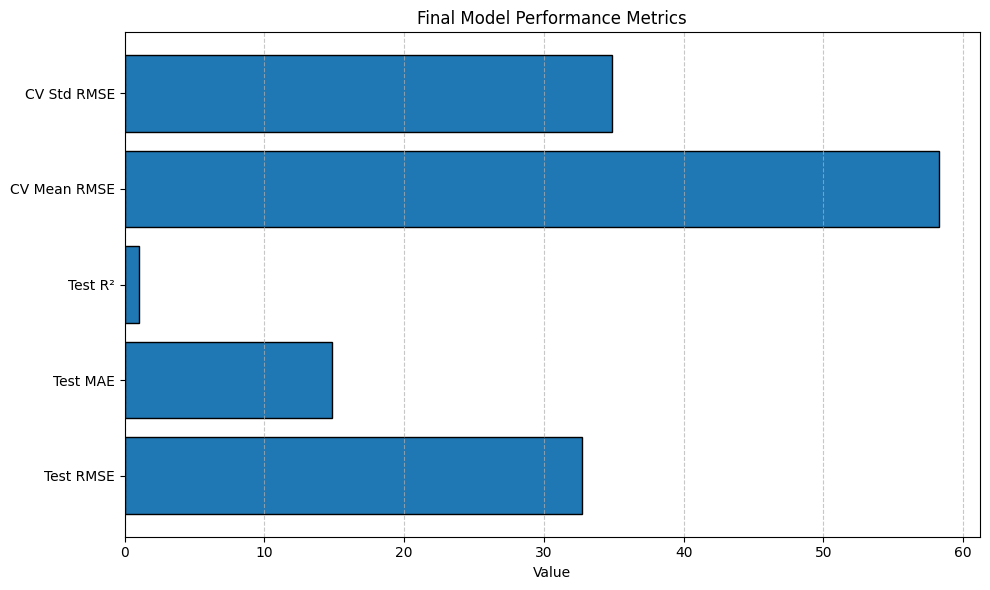

In [11]:
import matplotlib.pyplot as plt
metrics = ["Test RMSE", "Test MAE", "Test R²", "CV Mean RMSE", "CV Std RMSE"]
values = [32.69, 14.83, 1.0000, 58.29, 34.85]

plt.figure(figsize=(10, 6))
plt.barh(metrics, values, edgecolor='black')
plt.title('Final Model Performance Metrics')
plt.xlabel('Value')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 6. Conclusion [2 pts]
- Clearly state your main findings and how they address your original objectives
- Highlight the business or practical implications of your findings 
- Discuss the limitations and constraints of your analysis clearly and transparently
- Suggest potential improvements or future directions

# Conclusion

Overall, this project showed that you can predict property tax values really accurately using a machine learning model like Random Forest. The model not only hit super high accuracy, but it also handled the messy, imperfect real estate data better than we expected. For practical uses, this kind of model could help real estate companies, tax assessors, or even investors quickly estimate property values without needing full manual appraisals.

That said, the project wasn't without its challenges. The model still had trouble with extreme outliers and very unique properties that didn’t follow the usual patterns. Plus, the heavy lifting required by large ensemble models means you really need good computational resources — working purely in the cloud on limited free platforms can cause problems.

If we were to keep working on this, the next steps would be to clean the data even more carefully, especially tackling missing values and outliers upfront. All in all, the project turned out great and showed how much potential machine learning has when applied thoughtfully to real-world problems.



# Power Point Presentation

Our Power Point Presentation can be viewed here: 

https://www.canva.com/design/DAGlZytdmt8/RjpmcVzYRabMdTPiTm83Dw/view?utm_content=DAGlZytdmt8&utm_campaign=designshare&utm_medium=link2&utm_source=uniquelinks&utlId=heceb53dc61


# GitHub 

Our work, including the Presentation Powerpoint PDF, can be found at our GitHub: https://github.com/Siobhan-C/Milestone_Two
